# Titanic machine learning

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### etapes
1-nettoyer le dataset  
2-analyser les données/garder les colonnes utiles  
3-predire avec la df de train  
4-comparer les modèles de prédiction  

## 1-nettoyer le dataset

In [2]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### On voit qu'il y'a des valeurs manquantes dans les colonnes age,cabin et embarked

On remplace les ages manquants par l'age moyen

In [5]:
age_moyen = df_train['Age'].mean()
age_moyen

29.69911764705882

In [6]:
df_train.loc[df_train['Age'].isnull(),'Age'] = age_moyen

In [7]:
df_train['Age'].isnull().sum()

0

On remplace les données d'embarquements manquantes par la porte majoritaire

In [8]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
df_train.loc[df_train['Embarked'].isnull(),'Embarked']= 'S'
df_train['Embarked'].isnull().sum()

0

In [10]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

On remplace les données manquantes de la colonne Cabin

In [11]:
df_train['Cabin'].isnull().sum()

687

In [12]:
df_train.loc[df_train['Cabin'].isnull(),'Cabin']= 'Pas_de_cabine'
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Pas_de_cabine,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Pas_de_cabine,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Pas_de_cabine,S


In [13]:
df_train.loc[df_train['Cabin']=='Pas_de_cabine','Survived'].mean()

0.29985443959243085

In [14]:
df_train.loc[df_train['Cabin']!='Pas_de_cabine','Survived'].mean()

0.6666666666666666

In [15]:
df_train['Cabin'] = df_train['Cabin'].apply(lambda x: x[0] if x != 'Pas_de_cabine' else 'Pas_de_cabine')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Pas_de_cabine,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Pas_de_cabine,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Pas_de_cabine,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Pas_de_cabine,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Pas_de_cabine,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C


In [16]:
df_train['Cabin'].value_counts()

Pas_de_cabine    687
C                 59
B                 47
D                 33
E                 32
A                 15
F                 13
G                  4
T                  1
Name: Cabin, dtype: int64

In [17]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Le dateframe a été nettoyé

## 2-analyser les données/garder les colonnes utiles

### Il faut d'abord mettre les valeurs à garder sous forme numérique

In [18]:
df_train = df_train.drop(['Name'], axis=1)
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,Pas_de_cabine,S
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C,C
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,Pas_de_cabine,S
3,4,1,1,female,35.000000,1,0,113803,53.1000,C,S
4,5,0,3,male,35.000000,0,0,373450,8.0500,Pas_de_cabine,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,211536,13.0000,Pas_de_cabine,S
887,888,1,1,female,19.000000,0,0,112053,30.0000,B,S
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.4500,Pas_de_cabine,S
889,890,1,1,male,26.000000,0,0,111369,30.0000,C,C


In [19]:
df_train = df_train.drop(['PassengerId'], axis=1)
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,Pas_de_cabine,S
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C,C
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,Pas_de_cabine,S
3,1,1,female,35.000000,1,0,113803,53.1000,C,S
4,0,3,male,35.000000,0,0,373450,8.0500,Pas_de_cabine,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,Pas_de_cabine,S
887,1,1,female,19.000000,0,0,112053,30.0000,B,S
888,0,3,female,29.699118,1,2,W./C. 6607,23.4500,Pas_de_cabine,S
889,1,1,male,26.000000,0,0,111369,30.0000,C,C


In [20]:
df_train = df_train.drop(['Ticket'], axis=1)
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,7.2500,Pas_de_cabine,S
1,1,1,female,38.000000,1,0,71.2833,C,C
2,1,3,female,26.000000,0,0,7.9250,Pas_de_cabine,S
3,1,1,female,35.000000,1,0,53.1000,C,S
4,0,3,male,35.000000,0,0,8.0500,Pas_de_cabine,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,Pas_de_cabine,S
887,1,1,female,19.000000,0,0,30.0000,B,S
888,0,3,female,29.699118,1,2,23.4500,Pas_de_cabine,S
889,1,1,male,26.000000,0,0,30.0000,C,C


In [21]:
df_groupby_cabin = df_train.groupby('Cabin')['Survived'].mean()
df_groupby_cabin

Cabin
A                0.466667
B                0.744681
C                0.593220
D                0.757576
E                0.750000
F                0.615385
G                0.500000
Pas_de_cabine    0.299854
T                0.000000
Name: Survived, dtype: float64

on peut donc garder la colonne cabine car il y'a une corrélation avec survived

In [22]:
df_train['Sex'] = df_train['Sex'].replace({'male': 0, 'female': 1})
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.000000,1,0,7.2500,Pas_de_cabine,S
1,1,1,1,38.000000,1,0,71.2833,C,C
2,1,3,1,26.000000,0,0,7.9250,Pas_de_cabine,S
3,1,1,1,35.000000,1,0,53.1000,C,S
4,0,3,0,35.000000,0,0,8.0500,Pas_de_cabine,S
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,Pas_de_cabine,S
887,1,1,1,19.000000,0,0,30.0000,B,S
888,0,3,1,29.699118,1,2,23.4500,Pas_de_cabine,S
889,1,1,0,26.000000,0,0,30.0000,C,C


In [23]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [24]:
df_train['Embarked'] = df_train['Embarked'].replace({'S': 0, 'C': 1,'Q':2})
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.000000,1,0,7.2500,Pas_de_cabine,0
1,1,1,1,38.000000,1,0,71.2833,C,1
2,1,3,1,26.000000,0,0,7.9250,Pas_de_cabine,0
3,1,1,1,35.000000,1,0,53.1000,C,0
4,0,3,0,35.000000,0,0,8.0500,Pas_de_cabine,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,Pas_de_cabine,0
887,1,1,1,19.000000,0,0,30.0000,B,0
888,0,3,1,29.699118,1,2,23.4500,Pas_de_cabine,0
889,1,1,0,26.000000,0,0,30.0000,C,1


On verfie que les types des variables modifiés sont bien des entiers

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


On s'appercoit qu'on doit encore modifier cabin,fare et age

In [26]:
df_train['Cabin'].value_counts()

Pas_de_cabine    687
C                 59
B                 47
D                 33
E                 32
A                 15
F                 13
G                  4
T                  1
Name: Cabin, dtype: int64

In [27]:
df_train['Cabin'] = df_train['Cabin'].replace({'Pas_de_cabine': 0, 'C': 1,'B':2,'D': 3, 'E': 4,'A':5,'F': 6, 'G': 7,'T':8})
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.000000,1,0,7.2500,0,0
1,1,1,1,38.000000,1,0,71.2833,1,1
2,1,3,1,26.000000,0,0,7.9250,0,0
3,1,1,1,35.000000,1,0,53.1000,1,0
4,0,3,0,35.000000,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0,0
887,1,1,1,19.000000,0,0,30.0000,2,0
888,0,3,1,29.699118,1,2,23.4500,0,0
889,1,1,0,26.000000,0,0,30.0000,1,1


##### On va maintenant créer des tranches d'age et de tarif, puis convertir chaque tranche en entier.

In [28]:
df_train['Age'] = df_train['Age'].round().astype(int)
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22,1,0,7.2500,0,0
1,1,1,1,38,1,0,71.2833,1,1
2,1,3,1,26,0,0,7.9250,0,0
3,1,1,1,35,1,0,53.1000,1,0
4,0,3,0,35,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13.0000,0,0
887,1,1,1,19,0,0,30.0000,2,0
888,0,3,1,30,1,2,23.4500,0,0
889,1,1,0,26,0,0,30.0000,1,1


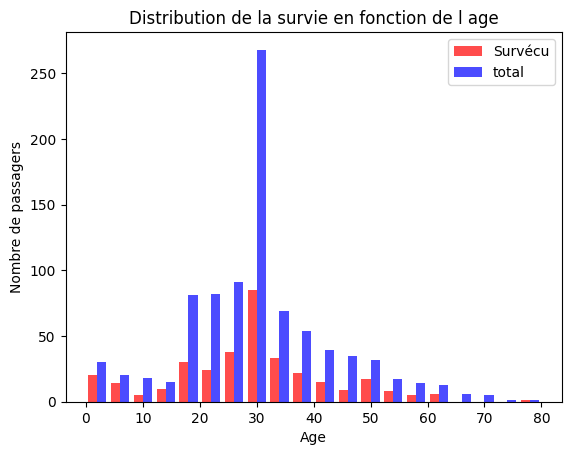

In [29]:
survived = df_train.loc[df_train['Survived'] == 1,'Age']
plt.hist([survived,df_train['Age']], bins=20, label=['Survécu','total'], color=['red','blue'], alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Nombre de passagers')
plt.title('Distribution de la survie en fonction de l age')
plt.legend()


plt.show()

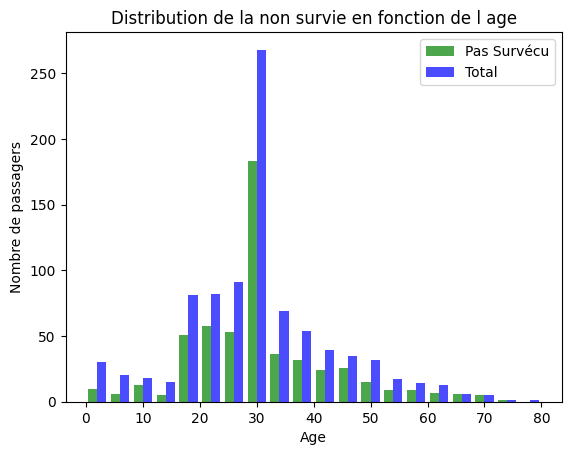

In [30]:
not_survived = df_train.loc[df_train['Survived'] == 0,'Age']
plt.hist([not_survived,df_train['Age']], bins=20, label=['Pas Survécu','Total'], color=['green','blue'], alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Nombre de passagers')
plt.title('Distribution de la non survie en fonction de l age')
plt.legend()


plt.show()

In [33]:
df_train.loc[df_train['Age']<=14,'Age'] = 0
df_train.loc[(df_train['Age']>14)&(df_train['Age']<=28),'Age'] = 1
df_train.loc[(df_train['Age']>28)&(df_train['Age']<=42),'Age'] = 2
df_train.loc[(df_train['Age']>42)&(df_train['Age']<=56),'Age'] = 3
df_train.loc[(df_train['Age']>56)&(df_train['Age']<=70),'Age'] = 4
df_train.loc[df_train['Age']>70,'Age'] = 5
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,0,1,0,7.2500,0,0
1,1,1,1,0,1,0,71.2833,1,1
2,1,3,1,0,0,0,7.9250,0,0
3,1,1,1,0,1,0,53.1000,1,0
4,0,3,0,0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,0,13.0000,0,0
887,1,1,1,0,0,0,30.0000,2,0
888,0,3,1,0,1,2,23.4500,0,0
889,1,1,0,0,0,0,30.0000,1,1


##### Il faut maintenant convertir Fare en tranches puis en entiers